In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

2024-08-15 06:35:56.936343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 06:35:56.936494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 06:35:57.088710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype=np.float32)

# Split data into features (pixels) and labels (numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values / 255  # normalization

# Train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42
)

In [4]:
# Create TensorFlow datasets for train and test sets
train_dataset = tf.data.Dataset.from_tensor_slices((features_train, targets_train))
test_dataset = tf.data.Dataset.from_tensor_slices((features_test, targets_test))

# Batch size, number of iterations, and number of epochs
batch_size = 100
n_iters = 10000
num_epochs = int(n_iters / (len(features_train) / batch_size))

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

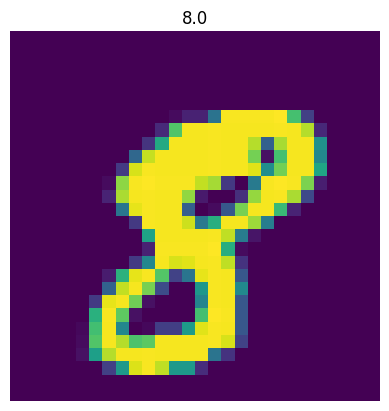

In [5]:
# Visualize one of the images in the dataset
plt.imshow(features_numpy[10].reshape(28, 28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [6]:
class RNNModel(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        
        # RNN Layer
        self.rnn = layers.SimpleRNN(hidden_dim, 
                                    return_sequences=False, 
                                    return_state=False, 
                                    activation='relu')
        
        # Fully connected (Readout) layer
        self.fc = layers.Dense(output_dim)
    
    def call(self, x):
        # Reshape input to (batch_size, seq_dim, input_dim)
        x = tf.reshape(x, [-1, seq_dim, input_dim])
        # RNN layer
        x = self.rnn(x)
        # Fully connected layer (output)
        x = self.fc(x)
        return x

# Define input dimensions and create the model
input_dim = 28    # input dimension (same as PyTorch)
hidden_dim = 100  # hidden layer dimension
layer_dim = 1     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

In [7]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.05),
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
seq_dim = 28  # The sequence length (height of the image in pixels)

In [9]:
RNN = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2970 - loss: 1.9756 - val_accuracy: 0.2086 - val_loss: 2.1930
Epoch 2/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5173 - loss: 1.3564 - val_accuracy: 0.7945 - val_loss: 0.6718
Epoch 3/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7782 - loss: 0.6854 - val_accuracy: 0.8139 - val_loss: 0.6107
Epoch 4/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8394 - loss: 0.5030 - val_accuracy: 0.8969 - val_loss: 0.3505
Epoch 5/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8842 - loss: 0.3797 - val_accuracy: 0.9095 - val_loss: 0.3003
Epoch 6/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9041 - loss: 0.3205 - val_accuracy: 0.9163 - val_loss: 0.2694
Epoch 7/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9081 - loss: 0.3129 - val_accuracy: 0.9152 - val_loss: 0.2830
Epoch 8/29
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9119 - loss: 0.3048 - val_accuracy:

In [10]:
# loss_list = []
# iteration_list = []
# accuracy_list = []
# count = 0

# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_dataset):
        
#         # Reshape images to (batch_size, seq_dim, input_dim)
#         images = tf.reshape(images, (-1, seq_dim, input_dim))
        
#         with tf.GradientTape() as tape:
#             # Forward propagation
#             outputs = model(images)
            
#             # Calculate loss
#             loss = tf.keras.losses.sparse_categorical_crossentropy(labels, outputs, from_logits=True)
        
#         # Calculate gradients
#         gradients = tape.gradient(loss, model.trainable_variables)
        
#         # Update parameters
#         optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
#         count += 1
        
#         if count % 250 == 0:
#             # Calculate Accuracy         
#             correct = 0
#             total = 0
#             for images, labels in test_dataset:
#                 images = tf.reshape(images, (-1, seq_dim, input_dim))
                
#                 # Forward propagation
#                 outputs = model(images)
                
#                 # Get predictions
#                 predicted = tf.argmax(outputs, axis=1, output_type=tf.int32)
                
#                 # Total number of labels
#                 total += labels.shape[0]
                
#                 correct += tf.reduce_sum(tf.cast(predicted == labels, tf.int32))
            
#             accuracy = 100 * correct / total
            
#             # Store loss and iteration
#             loss_list.append(loss.numpy().mean())
#             iteration_list.append(count)
#             accuracy_list.append(accuracy.numpy())
            
#             if count % 500 == 0:
#                 # Print Loss and Accuracy
#                 print(f'Iteration: {count}  Loss: {loss.numpy().mean()}  Accuracy: {accuracy.numpy()} %')

In [11]:
loss_list = RNN.history['loss']
accuracy_list = RNN.history['accuracy']
iteration_list = range(1, num_epochs + 1)

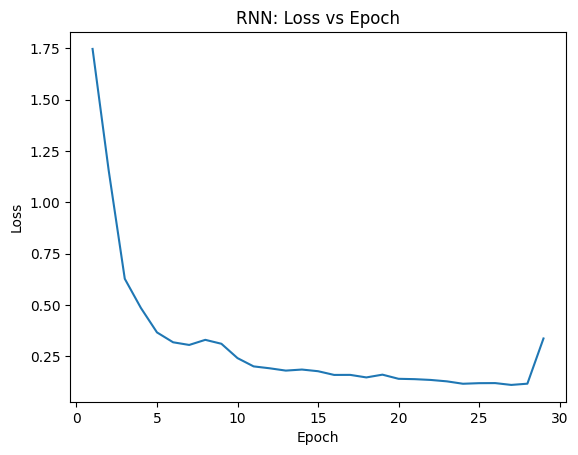

In [12]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Epoch")
plt.show()

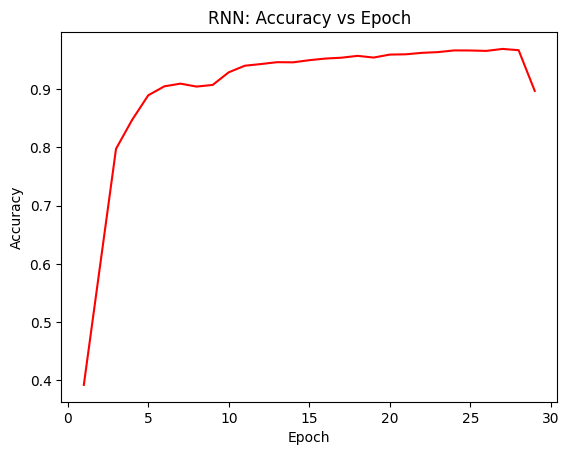

In [13]:
plt.plot(iteration_list, accuracy_list, color="red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Epoch")
plt.show()

In [14]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv', dtype=np.float32)
features_test = test.values / 255  # Normalize the data

In [15]:
predictions = model.predict(features_test.reshape(-1, seq_dim, input_dim))
predicted_labels = tf.argmax(predictions, axis=1).numpy()

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [16]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})

In [17]:
submission
print(test.shape)

(28000, 784)


In [18]:
submission.to_csv('submission.csv', index=False)